# Import library and data

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import datasets
books = pd.read_csv(r'C:\Users\Ojo Ridwan\Downloads\archive (13)\Books.csv')
users = pd.read_csv(r'C:\Users\Ojo Ridwan\Downloads\archive (13)\Users.csv')
ratings = pd.read_csv(r'C:\Users\Ojo Ridwan\Downloads\archive (13)\Ratings.csv')

C:\Users\Ojo Ridwan\AppData\Local\Temp\ipykernel_3168\335073962.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv(r'C:\Users\Ojo Ridwan\Downloads\archive (13)\Books.csv')


In [4]:
# First 3 rows of books dataset
print('BOOKS')
display(books.head(3))
print()
print('USERS')
display(users.head(3))
print()
print('RATINGS')
display(ratings.head(3))

BOOKS


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...



USERS


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN



RATINGS


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0


In [5]:
# Rows and columns of all datasets
print(books.shape)
print(users.shape)
print(users.shape)

(271360, 8)
(278858, 3)
(278858, 3)


In [6]:
# Info of all datasets
print(books.info())
print( '=' * 100)
print(users.info())
print( '=' * 100)
print(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), obje

In [7]:
# Check for non values in the datasets
print(books.isnull().sum())
print( '=' * 50)
print(users.isnull().sum())
print( '=' * 50)
print(ratings.isnull().sum())

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64
User-ID          0
Location         0
Age         110762
dtype: int64
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


In [8]:
# Check for duplicate values in the datasets
print(books.duplicated().sum())
print(users.duplicated().sum())
print(ratings.duplicated().sum())

0
0
0


In [9]:
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [10]:
filtered_books =  books[books['Year-Of-Publication'].isin(['Gallimard', 'DK Publishing Inc'])]
filtered_books


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [11]:
books = books[~books['Year-Of-Publication'].isin(filtered_books['Year-Of-Publication'])]

In [12]:
# Change the type of 'Year of publication' from Object to integer

books = books.astype({'Year-Of-Publication' : 'int'})

In [13]:
# Drop some columns not needed
columns_to_drop = ['Image-URL-S', 'Image-URL-M']

books = books.drop(columns=columns_to_drop, axis = 1)

In [14]:
# Rename columns

books = books.rename(columns={'Book-Title': 'book_title', 
                              'Book-Author': 'book_author', 
                              'Year-Of-Publication': 'year', 
                              'Image-URL-L': 'image_url'})

In [15]:
books.columns

Index(['ISBN', 'book_title', 'book_author', 'year', 'Publisher', 'image_url'], dtype='object')

In [16]:
books.head(2)

,ISBN,book_title,book_author,year,Publisher,image_url
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...


In [17]:
#statistics of books dataset
books.describe()

,year
count,271357.000000
mean,1959.760817
std,257.994226
min,0.000000
25%,1989.000000
50%,1995.000000
75%,2000.000000
max,2050.000000


In [18]:
ratings.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [19]:
# Rename ratings columns
ratings = ratings.rename(columns={'User-ID': 'user_id', 
                              'Book-Rating': 'book_rating'})

In [20]:
# Summary of ratings dataset
ratings.describe()

,user_id,book_rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [21]:
# Rename column in users dataset
users = users.rename(columns={'User-ID': 'user_id'})

In [22]:
# Summary of users dataset
users.describe()

,user_id,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [23]:
# Merge books and ratings dataset to find ratings on each book
book_rating_df = pd.merge(books, ratings, on='ISBN')

In [24]:
book_rating_df.head(2)

,ISBN,book_title,book_author,year,Publisher,image_url,user_id,book_rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,8,5


# EDA

In [25]:
book_rating_df.head(2)

,ISBN,book_title,book_author,year,Publisher,image_url,user_id,book_rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,8,5


In [26]:
book_rating_df.shape

(1031132, 8)

In [27]:
book_rating_df.isna().sum() # Number of missing values

ISBN           0
book_title     0
book_author    2
year           0
Publisher      2
image_url      0
user_id        0
book_rating    0
dtype: int64

In [28]:
# Drop missing values
book_rating_df.dropna(inplace = True)

In [29]:
book_rating_df.describe()

,year,user_id,book_rating
count,1.031128e+06,1.031128e+06,1.031128e+06
mean,1.968195e+03,1.405946e+05,2.839032e+00
std,2.311019e+02,8.052485e+04,3.854147e+00
min,0.000000e+00,2.000000e+00,0.000000e+00
25%,1.992000e+03,7.041500e+04,0.000000e+00
50%,1.997000e+03,1.412100e+05,0.000000e+00
75%,2.001000e+03,2.114260e+05,7.000000e+00
max,2.050000e+03,2.788540e+05,1.000000e+01


In [30]:
# Top 10 books and authors have 10 ratings
book_rating_df.sort_values(by='book_rating' , ascending=False)[['book_title', 'book_author', 'book_rating']].head(10)

,book_title,book_author,book_rating
684639,Return of the Jedi: A Storybook (Star Wars Ser...,J. J. Gardner,10
119647,The Hours: A Novel,Michael Cunningham,10
822267,Vixens,Bertrice Small,10
996744,A Girl from Yamhill: A Memoir,Beverly Cleary,10
748821,Bitter with Baggage Seeks Same : The Life and ...,Sloane Tanen,10
59149,Red Dragon,Thomas Harris,10
176253,A Clockwork Orange (Norton Paperback Fiction),Anthony Burgess,10
119646,The Hours: A Novel,Michael Cunningham,10
996746,Shattered Deceptions,Autumn McCullah,10
545787,Beyond Civilization: Humanity's Next Great Adv...,Daniel Quinn,10


In [31]:
# Publisher with the highest number of book published
book_rating_df.Publisher.value_counts().head(10)

Publisher
Ballantine Books            34724
Pocket                      31989
Berkley Publishing Group    28614
Warner Books                25506
Harlequin                   25027
Bantam Books                23598
Bantam                      20007
Signet Book                 19155
Avon                        17352
Penguin Books               17033
Name: count, dtype: int64

In [32]:
# Ratings with the total of each
book_rating_df.book_rating.value_counts()

book_rating
0     647291
8      91803
10     71224
7      66401
9      60776
5      45355
6      31687
4       7617
3       5118
2       2375
1       1481
Name: count, dtype: int64

In [33]:
# Top 10 authors have overall maximum ratings
book_rating_df.groupby('book_author')['book_rating'].sum().sort_values(ascending=False).head(10)


book_author
Stephen King          36254
Nora Roberts          22416
John Grisham          19184
James Patterson       18375
J. K. Rowling         15662
Mary Higgins Clark    12583
Janet Evanovich       11838
Dean R. Koontz        11169
Sue Grafton            9537
Anne Rice              9198
Name: book_rating, dtype: int64

In [34]:
# Top 10 authors have overall minimium ratings
book_rating_df.groupby('book_author')['book_rating'].sum().sort_values(ascending=True).head(10)

book_author
Joseph E Persico            0
Julian Semyonov             0
Julian Smith                0
Juliana Bragg               0
Juliana Davison             0
Juliana Farrell             0
Juliann Sivulka             0
Julianna Bethlen            0
Julianne Blair Bochinski    0
Julianne Dueber             0
Name: book_rating, dtype: int64

In [35]:
# Top 10 years have overall maximun ratings
book_rating_df.groupby('year')['book_rating'].sum().sort_values(ascending=False).head(10)

year
2002    290430
2001    246157
2003    226566
1999    220026
2000    213938
1998    186565
1997    165651
1996    161833
1995    143912
1994    126351
Name: book_rating, dtype: int64

In [36]:
# Number of book published in each year, top 10
book_rating_df.year.value_counts().head(10)

year
2002    91799
2001    79800
1999    75193
2003    72538
2000    72326
1998    64208
1997    59357
1996    58825
1995    54090
1994    46444
Name: count, dtype: int64

In [37]:
book_rating_df.columns

Index(['ISBN', 'book_title', 'book_author', 'year', 'Publisher', 'image_url',
       'user_id', 'book_rating'],
      dtype='object')

In [38]:
# Top 10 author with the most book published
book_rating_df.book_author.value_counts().head(10)

book_author
Stephen King          10053
Nora Roberts           8429
John Grisham           6010
James Patterson        5845
Mary Higgins Clark     4777
Dean R. Koontz         4313
Tom Clancy             4036
Danielle Steel         3726
Sue Grafton            3457
Janet Evanovich        3350
Name: count, dtype: int64

In [39]:
# Top 10 books with the most publication
book_rating_df.book_title.value_counts().head(10)

book_title
Wild Animus                                        2502
The Lovely Bones: A Novel                          1295
The Da Vinci Code                                   898
A Painted House                                     838
The Nanny Diaries: A Novel                          828
Bridget Jones's Diary                               815
The Secret Life of Bees                             774
Divine Secrets of the Ya-Ya Sisterhood: A Novel     740
The Red Tent (Bestselling Backlist)                 723
Angels &amp; Demons                                 670
Name: count, dtype: int64

In [40]:
# Top 10 publisher with the most publications
book_rating_df.Publisher.value_counts().head(10)

Publisher
Ballantine Books            34724
Pocket                      31989
Berkley Publishing Group    28614
Warner Books                25506
Harlequin                   25027
Bantam Books                23598
Bantam                      20007
Signet Book                 19155
Avon                        17352
Penguin Books               17033
Name: count, dtype: int64

# Data Visualization

In [41]:
# Import data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

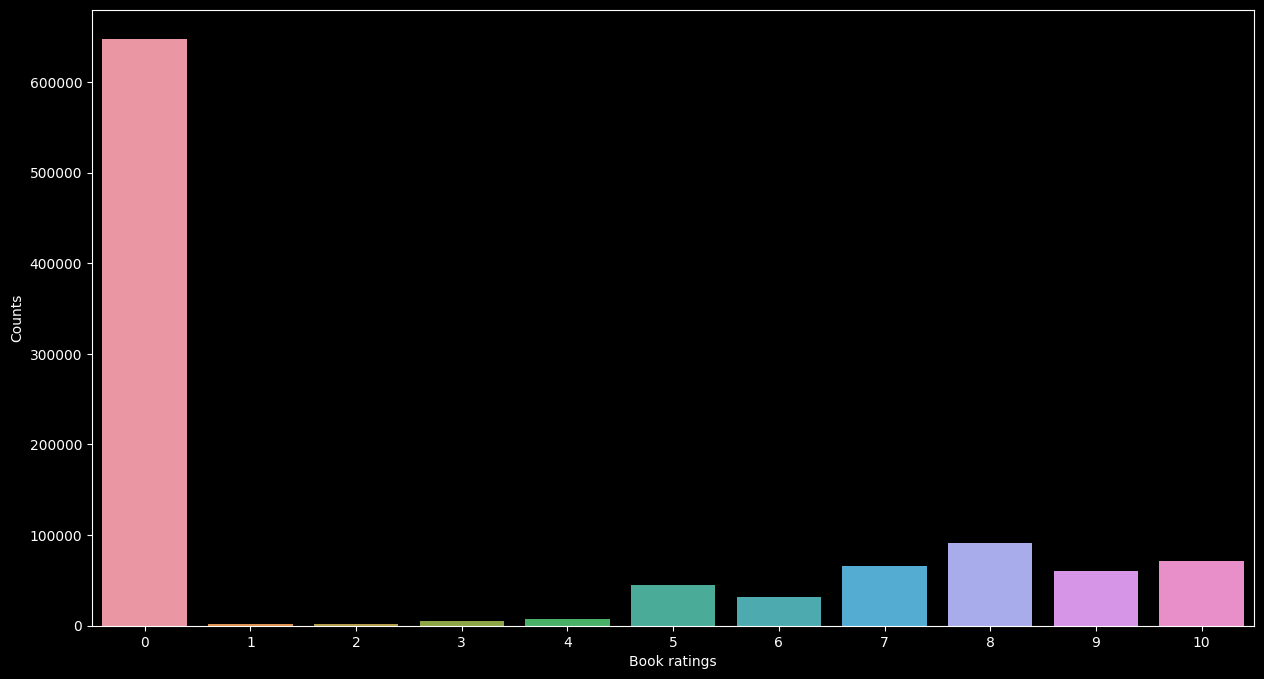

In [42]:
# Bar graph according to rating on books
plt.style.use('dark_background')
plt.figure(figsize=(15,8))
sns.countplot(x='book_rating', data=book_rating_df)
plt.xlabel('Book ratings')
plt.ylabel('Counts')
plt.show()

In [43]:
book_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1031128 entries, 0 to 1031131
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   ISBN         1031128 non-null  object
 1   book_title   1031128 non-null  object
 2   book_author  1031128 non-null  object
 3   year         1031128 non-null  int32 
 4   Publisher    1031128 non-null  object
 5   image_url    1031128 non-null  object
 6   user_id      1031128 non-null  int64 
 7   book_rating  1031128 non-null  int64 
dtypes: int32(1), int64(2), object(5)
memory usage: 66.9+ MB


In [44]:
book_rating_df.year.value_counts()

year
2002    91799
2001    79800
1999    75193
2003    72538
2000    72326
        ...  
1914        1
1906        1
1934        1
1910        1
2037        1
Name: count, Length: 116, dtype: int64

In [45]:
book_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1031128 entries, 0 to 1031131
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   ISBN         1031128 non-null  object
 1   book_title   1031128 non-null  object
 2   book_author  1031128 non-null  object
 3   year         1031128 non-null  int32 
 4   Publisher    1031128 non-null  object
 5   image_url    1031128 non-null  object
 6   user_id      1031128 non-null  int64 
 7   book_rating  1031128 non-null  int64 
dtypes: int32(1), int64(2), object(5)
memory usage: 66.9+ MB


In [46]:
book_rating_df['year'].corr(book_rating_df['book_rating'])

-0.0077325631549564665

In [47]:
correlation_df = book_rating_df[['year', 'user_id', 'book_rating']]
correlation_df.head()

,year,user_id,book_rating
0,2002,2,0
1,2001,8,5
2,2001,11400,0
3,2001,11676,8
4,2001,41385,0


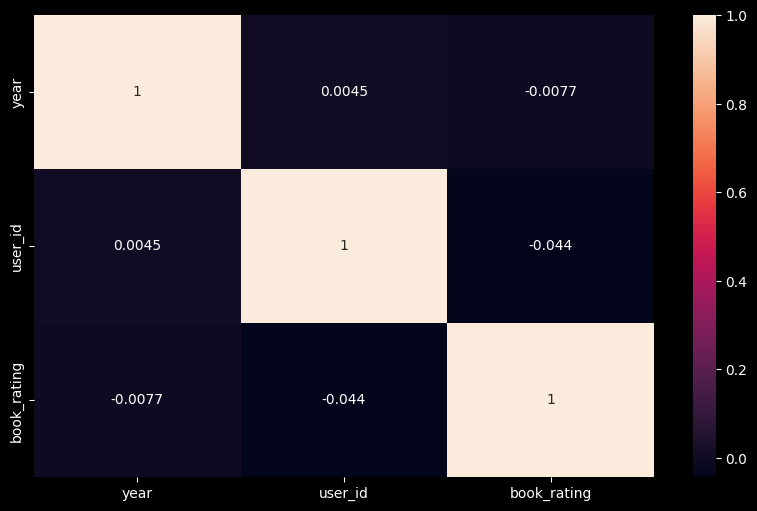

In [48]:
# Correlation plot
plt.figure(figsize=(10,6))
sns.heatmap(correlation_df.corr(),annot=True)
plt.show()

In [49]:
book_rating_df.shape

(1031128, 8)

# Top 50 Books with 250 ratings 

In [50]:
# Books with number of people rating on it
num_rating_df = book_rating_df['book_title'].value_counts().reset_index()
num_rating_df = num_rating_df.rename(columns={'index' : 'book_title' , 'book_title' : 'num_ratings'})
num_rating_df.head()

,num_ratings,count
0,Wild Animus,2502
1,The Lovely Bones: A Novel,1295
2,The Da Vinci Code,898
3,A Painted House,838
4,The Nanny Diaries: A Novel,828


# Collaborative Filtering

In [62]:
# Convert book rating to numeric value
book_rating_df['book_rating'] = pd.to_numeric(book_rating_df['book_rating'], errors='coerce')

# Calculate the sum of 'book_rating' for each 'user_id'
user_rating_sum = book_rating_df.groupby('user_id')['book_rating'].transform('sum')

# Filter rows where the sum of 'book_rating' for each 'user_id' is greater than 500
final_rating = book_rating_df[user_rating_sum > 500]

# Now 'filtered_book_rating_df' contains only the rows where the sum of 'book_rating' for each 'user_id' is greater than 200
final_rating.shape

(381184, 8)

In [63]:
# Pivot table for vectorization
pivot_rating = final_rating.pivot_table(index= 'book_title', columns=('user_id'), values='book_rating')

In [64]:
# Fill the NaN with zero
pivot_rating.fillna(0, inplace=True)
pivot_rating.head(2)

user_id,638,1733,2033,2110,2276,2766,3363,3757,3827,4017,...,273113,273718,274004,274061,274111,274301,275970,276680,277427,278418
book_title,,,,,,,,,,,,,,,,,,,,,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Always Have Popsicles,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
# Import sklearn library for cosine difference
from sklearn.metrics.pairwise import cosine_similarity

In [65]:
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity

# Assuming 'pivot_rating' is a DataFrame
sparse_matrix = csr_matrix(pivot_rating.values)

# Calculate cosine similarity on the sparse matrix
similarity_score = cosine_similarity(sparse_matrix)

MemoryError: Unable to allocate 146. GiB for an array with shape (140043, 140043) and data type float64

In [56]:
# Similar vectors
similarity_score = cosine_similarity(pivot_rating)

MemoryError: Unable to allocate 233. GiB for an array with shape (176686, 176686) and data type float64

In [ ]:
similarity_score.shape

(698, 698)

In [ ]:
np.where(pivot_rating.index == '1984')[0][0]

0

In [ ]:
sorted(list(enumerate(similarity_score[0])), key=lambda x:x[1], reverse = True)[1:11]

[(47, 0.27777745397011955),
 (538, 0.26396193711234966),
 (82, 0.2366937434740099),
 (626, 0.23591670663157352),
 (544, 0.2262639743141286),
 (178, 0.22222254415660225),
 (494, 0.21057743765309012),
 (339, 0.20675540390453995),
 (547, 0.20025063706783053),
 (514, 0.19972624710300058)]

In [ ]:
pivot_rating.index[0]

'1984'

In [ ]:
# Function of top 10 recommended books
def recommend(book_name):
    index = np.where(pivot_rating.index == book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_score[index])), key=lambda x:x[1], reverse = True)[1:11]
    for i in similar_items:
        print(pivot_rating.index[i[0]])        

In [ ]:
#recommendations
recommend('The Notebook')

A Walk to Remember
The Rescue
One Door Away from Heaven
Toxin
The Five People You Meet in Heaven
Nights in Rodanthe
Suzanne's Diary for Nicholas
Everything's Eventual : 14 Dark Tales
The Guardian
Fine Things


# Pickle

In [ ]:
# Pickle for web development
import pickle
pickle.dump(pt.to_dict(), open('books.pkl' , 'wb'))
loaded_model = pickle.load(open('books.pkl' , 'rb'))
pickle.dump(similarity_score, open('similarity.pkl', 'wb'))

In [ ]:
pickle.dump(books.to_dict(), open('img.pkl' , 'wb'))
loaded_img = pickle.load(open('img.pkl' , 'rb'))